# Assignment 5: Exploring Hashing


In this exercise, we will begin to explore the concept of hashing and how it related to various object containers with respect to computational complexity.  We will begin with the base code for as described in Chapter 5 of Grokking Algorithms (Bhargava 2016).  


## Deliverables:

We will again generate random data for this assignment.  

    1) Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, just make sure there are no duplicates names) and store those names in an unsorted list.

    2) Now store the above names in a set
    3) Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.


    
    4) Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.
    5) Search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.
    6) Create a table and plot comparing times of linear search, binary search and set lookup for the six names using Python (matplotlib or Seaborn) or JavaScript (D3) visualization tools to illustrate algorithm performance. 
    
### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. Setup: Library imports, Function construction and Array generation

In [40]:
import numpy as np
import pandas as pd

import seaborn as sns
import time

import random
import string


RANDOM_SEED = 8 #sets random seed

In [41]:


def random_string(str_length, num_strings):
    str_list = [] #instantiates an empty list to hold the strings
    for i in range(0,num_strings): #loop to generate the specified number of strings
        str_list.append(''.join(random.choice(string.ascii_lowercase) for m in range(str_length))) #generates a string of the defined character length 
    return str_list #returns the string list




def MergeSort(arr):
    if len(arr) > 1:
          
        mid = len(arr)//2 # gets middle
        Left = arr[:mid] #splits elements left of middle
        Right = arr[mid:] #splits elements right of middle

        MergeSort(Left) #recursive call on left 
        MergeSort(Right) #recursive call on right
 #set all indicies to 0 
        i=0
        k=0
        j=0
 #below checks the values for if elements are sorted, if unsorted: swap. Merge to the original list    
        while i < len(Left) and j < len(Right):
            if Left[i] < Right[j]:
                arr[k] = Left[i] #makes k index of arr left[i] if it's less than Right[j]
                i += 1 #increments i (the left index)
               
            else:
                arr[k] = Right[j] #if right value is lss than left, makes arr[k] the value of right and increments the right index
                j += 1 #increments j
            k += 1 #increments the arr index
   
        while i < len(Left): #checks to see if reamaining elements in left (less than mid), if so adds to arr at k index and increments i and k
            arr[k] = Left[i]
            i += 1 #increments i
            k += 1 #increments k
 
        while j < len(Right): #checks to see if remaining elements in right (greater than mid), if so adds to arr at k index and increments j and k.
            arr[k] = Right[j]
            j += 1 #increments j
            k += 1 #increments k
        
        return arr



def Container(arr, fun):
    objects = [] #instantiates an empty list to collect the returns
    times = [] #instantiates an empty list to collect times for each computation

    start= time.perf_counter() #collects the start time
    obj = fun(arr) # applies the function to the arr object
    end = time.perf_counter() # collects end time
    duration = (end-start)* 1E3 #converts to milliseconds
    objects.append(obj)# adds the returns of the functions to the objects list
    times.append(duration) # adds the duration for computation to list
    return objects, duration


#function SimpleSearch uses a value counter "low" which increments after a non successful evalution of equivalence for the item within a given array. It returns the milliseconds elapsed and a register of all the incremental guesses.
def SimpleSearch(array, item):
    i = 0 
    guess = array[i]
    start = time.perf_counter() # gets fractional seconds
    while item != guess:
            i += 1
            guess = array[i] #increments low 
    end = time.perf_counter() # gets fractional seconds
    duration = end - start # calcualates difference in fractional seconds
    MilliElapsed = duration*1E3
 # returns a tuple which contains search time in milliseconds and register of the guesses
    return MilliElapsed


#function BinarySearch determines the range of the array and guwsses the midpoint of the range. A loop continues to to perform iterative range evaluations so long as the low value is equal or less than the high value of the array. When the gues converges to the item of interest, a tuple is returned with the time elapsed in milliseconds and the register of guesses.
# binary search for the sorted list

def BinarySearch(array, item):
    i = 0
    length = len(array)-1
    low = array[i] #finds lowest value in array
    high = array[length] #finds highest value in array
    register = [] # creates  empty register of increments; for debug purposes
    start = time.perf_counter() # gets fractional seconds
    while i <= length:     
        mid= (i + length)/2  # calculates midpoint of the range
        guess = int(mid)
        
        register.append(array[guess]) # appends increments to register; for debug purposes
        if array[guess] == item:
                end = time.perf_counter() #datetime.utcnow()
                duration = end - start
                MilliElapsed = duration*1E3
                #print('the string is found for:', n)  
#returns a tuple which contains search time in milliseconds and register of the guesses 
                return MilliElapsed #, register
        elif array[guess] > item: ##### loop for if guess is higher than the item
                high = array[guess] #resets high to the item at the guess index
                low = array[i] #resets low to the item at the i index (typically index 0)
                length = guess#resets length to guess
                #print('The guess went too high!', n, i, array[guess])
        elif array[guess] < item: ######loop for if guess is lower the the item
                low = array[guess] #reset low to the index of guess
                length = len(array)-1 #get the length of the array to pass to high
                high = array[length] #reset high to be the end of the list
                i = guess+1 #make sure we increment i so that it can become the end of the list, otherwise you are going to have a bad time!
                #print('The guess went too low!',n, i, high, length, low)

                


In [42]:
 
str100000 = random_string(str_length=10, num_strings=100000) #generates random strings
str100000_copy = str100000[:] #creates a copy of the random strings

start = time.perf_counter()
MergeSort(str100000)
end = time.perf_counter()
duration = end - start
MS_time = duration*1E3



positions = [9999, 29999, 49999, 69999, 89999, 99999] #positions of the names (needles)

needles = [str100000[i] for i in positions] #collects the needles from the haystack

str_test = random_string(str_length=10, num_strings=20) 
str_test_copy = str_test[:]

str100000_container =Container(str100000, MergeSort) #uses mergesort to sort the strings.
temp =str100000_container[0]
str100000_sorted =temp[0]
str_test_sorted = Container(str_test, MergeSort)

set_str100000 = set(str100000_copy)

In [43]:
print('the needles are:' , needles)
print('the length of the set is:' ,len(set_str100000))
print('the length of the unsorted copy is:' , len(str100000_copy))
print('the length of the sorted list (mergesort) is:', len(str100000_sorted))

the needles are: ['cqirajuvko', 'htwqgtbzdx', 'mzremtzdxg', 'setthurnwd', 'xjgmwfteog', 'zzzzfstoyz']
the length of the set is: 100000
the length of the unsorted copy is: 100000
the length of the sorted list (mergesort) is: 100000


# B. Sorting


Search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.


### B1. Linear Search of the unsorted list

In [44]:
#linear search for the unsorted list
Linear_times = []
for n in needles:
    temp_time = SimpleSearch(str100000_copy, n)
    Linear_times.append(temp_time)
print('The time reqired for each element in the unsorted array using linear search is:', Linear_times)

The time reqired for each element in the unsorted array using linear search is: [15.201799999886134, 8.330600000590493, 2.327300000615651, 11.807699999735632, 9.286100000281294, 5.649700000503799]


### B2. Binary Search of the sorted list

In [45]:
Binary_times = []
for n in needles:
    temp_time = BinarySearch(str100000, n)
    Binary_times.append(temp_time)
print('The time reqired for each element in the unsorted array using Binary search is:', Binary_times)

The time reqired for each element in the unsorted array using Binary search is: [0.07579999964946182, 0.10790000033011893, 0.0015000005078036338, 0.12349999997240957, 0.08309999975608662, 0.030900000638212077]


### B3. Set Removal for the Set

In [46]:
set_needles = set(needles)
set_times = {}
for needle in set_needles:
    start = time.perf_counter()
    set_str100000.intersection(needle)
    end = time.perf_counter()
    duration = end - start
    MilliElapsed = duration*1E3
    set_times[needle] = MilliElapsed
set_times

{'xjgmwfteog': 0.010300000212737359,
 'htwqgtbzdx': 0.0037999998312443495,
 'mzremtzdxg': 0.0021999994714860804,
 'cqirajuvko': 0.0035999992178403772,
 'zzzzfstoyz': 0.0016999993022182025,
 'setthurnwd': 0.00199999976757681}

# C. Summary

## Figure 1: Search times in milliseconds for Strings within an array of 100000 elements (each string 10 random lowercase alpha characters)

In [51]:
Strings = {
    'String': [needles[0], needles[1],needles[2], needles[3],needles[4], needles[5]],
    'PostionInSortedArray': [10000, 30000, 50000, 70000, 90000, 100000],
    'LinearSearch(Unsorted)': [Linear_times[0], Linear_times[1], Linear_times[2], Linear_times[3], Linear_times[4], Linear_times[5]], 
    'BinarySearch(Sorted)': [Binary_times[0], Binary_times[1], Binary_times[2], Binary_times[3], Binary_times[4], Binary_times[5]],
    'SetIntersection(Unsorted)': [set_times.get(needles[0]), set_times.get(needles[1]), set_times.get(needles[2]), set_times.get(needles[3]), set_times.get(needles[4]), set_times.get(needles[5])]
    }

string_df = pd.DataFrame.from_dict(Strings)
string_df['Binary+Sort'] = string_df['BinarySearch(Sorted)']+MS_time
string_df

,String,PostionInSortedArray,LinearSearch(Unsorted),BinarySearch(Sorted),SetIntersection(Unsorted),Binary+Sort
0,cqirajuvko,10000,15.2018,0.0758,0.0036,566.9609
1,htwqgtbzdx,30000,8.3306,0.1079,0.0038,566.9930
2,mzremtzdxg,50000,2.3273,0.0015,0.0022,566.8866
3,setthurnwd,70000,11.8077,0.1235,0.0020,567.0086
4,xjgmwfteog,90000,9.2861,0.0831,0.0103,566.9682
5,zzzzfstoyz,100000,5.6497,0.0309,0.0017,566.9160


## Table 1: Times for each algorithm given the length of the starting list

In [52]:
long_df =  string_df.melt(id_vars=['String', 'PostionInSortedArray'],
                    value_vars=['LinearSearch(Unsorted)', 'BinarySearch(Sorted)', 'SetIntersection(Unsorted)', 'Binary+Sort'],var_name='Algo', value_name='Time(ms)') 

## Figure 1: Sorth Algorithm Time Complexity

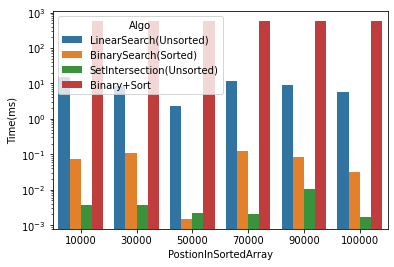

In [53]:
plot = sns.barplot(data = long_df, x='PostionInSortedArray', hue='Algo', y='Time(ms)')
plot.set_yscale('log')

## Figure 2: Merge and Quick Sort time complexity

In [50]:
MergeQuick_df = long_df[long_df.Algo != 'BubbleSort']
sns.scatterplot(data = MergeQuick_df, x='NumberOfStrings', hue='Algo', y='Time(ms)', s=100)

ValueError: Could not interpret value `NumberOfStrings` for parameter `x`

# Discussion

Three sorting algorithms were tested for their time complexity in sorting lists of varying sizes of string elements. Each string element in the list was randomly populated with 50 alphabetic lower case characters. The number of elements within the list was varied. Five lists containing 200, 400, 600, 800, and 1000 strings were sorted via BubbleSort, MergeSort, and QuickSort. The times (given in milliseconds) required to perform the sort are collected and displayed in Table 1. By far, the most inefficient sorting algorithm demonstrated here is the bubble sort whose complexity is shown graphically (figure 1) to grow at n\*n or O(n^2) rate. This makes sense for bubble sort as it compares n elements amongst n elements.  

Alternatively, the other two methodologies utilize a divide and conquer strategy. The list of strings when using QuickSort are divided into two arrays (greater and less) which contain values which are greater or less than a pivot value. In MergeSort a similar strategy is achieved by dividing the list into two arrays (left and right) which are left and right respectivly from the center element of the list. In both of these arrays recursion is used as the QuickSort and MergeSort functions are called on the subarrays. The result of this divide and conquer strategy is a complexity of n*logn or O(n*logn) in big O notation. A direct comparision of the times required for sorting the lists with these two methodologies are shown in Figure 2. 

In rare instances QuickSort may also dramatically underperform as the pivot element is always selected as the first item of the array (or subarray). If an array contained a list which was sorted largest to smallest already, this method could also have very high complexity as you would not divide the list recursively for an array of n size (this would also be n\*n complexity O(n^2)). It is interesting the QuickSort seems to perform slightly better than MergeSort, but both are quite efficient. Because of the splitting methodology employed by the MergeSort, there lacks a risk of any deviation from the O(n*logn) complexity. The begining array and subarrays are always split in half size-wise. It's therefore recommended that the MergeSort method be used as the time complexity will always be constant. 

# ------------------------ END ------------------------


In [ ]:
# binary search for the sorted list

def BinarySearch(array, item):
    i = 0
    length = len(array)-1
    low = array[i] #finds lowest value in array
    high = array[length] #finds highest value in array
    register = [] # creates  empty register of increments; for debug purposes
    start = time.perf_counter() # gets fractional seconds
    while i <= length:     
        mid= (i + length)/2  # calculates midpoint of the range
        guess = int(mid)
        
        register.append(array[guess]) # appends increments to register; for debug purposes
        if array[guess] == item:
                end = time.perf_counter() #datetime.utcnow()
                duration = end - start
                MilliElapsed = duration*1E3
                #print('the string is found for:', n)  
#returns a tuple which contains search time in milliseconds and register of the guesses 
                return MilliElapsed #, register
        elif array[guess] > item:
                high = array[guess]
                low = array[i]
                length = guess
                #print('The guess went too high!', n, i, array[guess])
        elif array[guess] < item: 
                low = array[guess]
                length = len(array)-1
                high = array[length]
                i = guess+1
                #print('The guess went too low!',n, i, high, length, low)

        else:
            print('item not found!')
                